### Loading the Libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Inspection

In [3]:
tcom = pd.read_csv('customer_churn.csv')

In [4]:
tcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Insights

Assumptions that there are no null values

There is no duplicates in the data

The TotalCharges column is having some ambiguity need to check

We have a lot of categorical values, this means we will have to do encoding

In [5]:
tcom.shape

(7043, 21)

In [6]:
tcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
tcom['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [8]:
#Changing TotalCharges which is an object data type to numeric data
tcom['TotalCharges'] = pd.to_numeric(tcom['TotalCharges'], errors='coerce')

In [9]:
tcom['TotalCharges'].value_counts()

TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64

### Data Preprocessing

In [10]:
tcom.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
tcom.dropna(inplace=True)

In [12]:
tcom.duplicated().sum()

0

In [13]:
#There's no use of the customerID column
tcom.drop(['customerID'], axis=1,inplace=True)

In [14]:
tcom.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [15]:
tcom.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [16]:
tcom.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Outlier detection

In [17]:
col_list = []

for x in tcom.columns:
  if tcom[x].dtype != 'object' and x != 'SeniorCitizen':
    col_list.append(x)


col_list

['tenure', 'MonthlyCharges', 'TotalCharges']

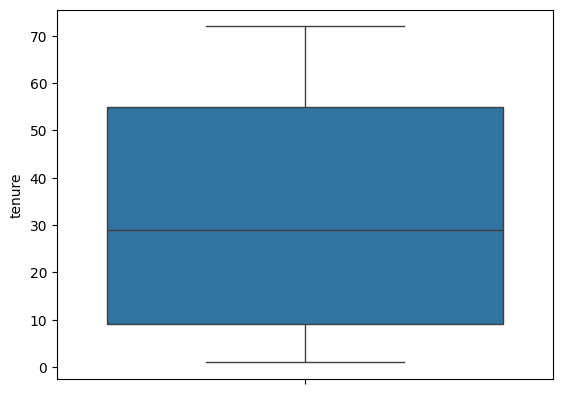

In [18]:
sns.boxplot(tcom['tenure'])
plt.show()

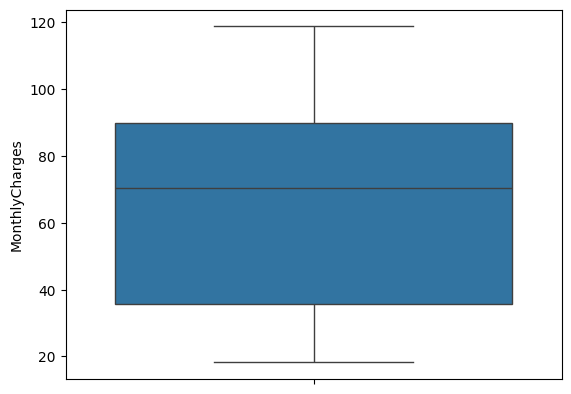

In [20]:
sns.boxplot(tcom['MonthlyCharges'])
plt.show()

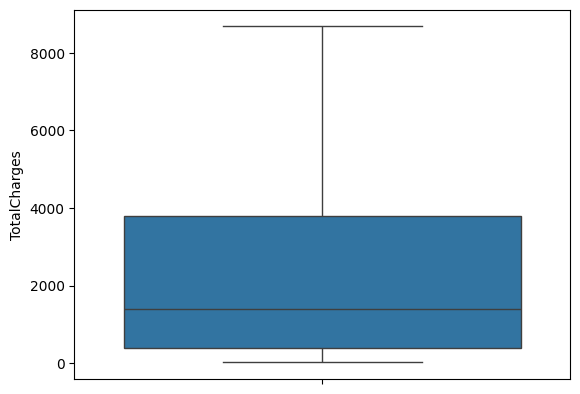

In [21]:
sns.boxplot(tcom['TotalCharges'])
plt.show()

##### There aren't any outliers

#### Encoding the categorical columns

In [22]:
encoder = LabelEncoder()

for col in tcom.columns:
  if tcom[col].dtype == 'object':
    tcom[col] = encoder.fit_transform(tcom[col])

In [23]:
tcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Model Building

In [24]:
# independent columns
x = tcom.drop('Churn', axis = 1)

# dependent columns
y = tcom['Churn']

In [25]:
#splitting into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 30)

In [32]:
#Helper function to measure performance of the model
def evaluate(pred, y_test):
  print(f'Accuracy Score : {accuracy_score(y_test, pred)}')
  print('===============================================')
  print(classification_report(y_test, pred))
  print('===============================================')
  print('Confusion Matrix: \n',confusion_matrix(y_test, pred))
  
#Helper function to call the models
def modelBuilder(model, x_train, x_test, y_train, y_test):
  model.fit(x_train, y_train)

  pred = model.predict(x_test)

  evaluate(pred, y_test)

#### Logistic Regression

In [33]:
lr_model = LogisticRegression()
modelBuilder(lr_model, x_train, x_test, y_train, y_test)

Accuracy Score : 0.8004739336492891
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1550
           1       0.65      0.55      0.59       560

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

Confusion Matrix: 
 [[1382  168]
 [ 253  307]]


#### Decision Tree

In [34]:
dt_model = DecisionTreeClassifier()
modelBuilder(dt_model, x_train, x_test, y_train, y_test)

Accuracy Score : 0.7421800947867299
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1550
           1       0.51      0.54      0.53       560

    accuracy                           0.74      2110
   macro avg       0.67      0.68      0.68      2110
weighted avg       0.75      0.74      0.74      2110

Confusion Matrix: 
 [[1261  289]
 [ 255  305]]


#### Random Forest

In [35]:
rf_model = RandomForestClassifier()
modelBuilder(rf_model, x_train, x_test, y_train, y_test)

Accuracy Score : 0.7900473933649289
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1550
           1       0.63      0.51      0.56       560

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Confusion Matrix: 
 [[1381  169]
 [ 274  286]]
